In [93]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neural_network, ensemble, preprocessing, model_selection, metrics
from imblearn.over_sampling import SMOTENC

In [94]:
df = pd.read_csv('../assets/data/2019-UT-ASD-Full/2019-UT-ASD-scrapped.csv')

In [95]:
df.shape

(111268, 87)

In [96]:
df.sort_values('RideInstance', inplace=True)
df.drop_duplicates(subset='RideInstance', keep='last', inplace=True)

In [97]:
df.shape

(93104, 87)

In [98]:
feature_df = df[['RideId', 'TrainId', 'DepartureStation', 'DestinationStation', 
                   'ArrivalTime', 'ArrivalDelay', 'DepartureTime', 'DepartureWindSpeed', 
                   'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow', 
                   'DepartureThunder', 'DepartureIceFormation', 

                   'DestinationWindSpeed', 'DestinationVisibility', 'DestinationFog', 'DestinationRain',
                   'DestinationSnow', 'DestinationThunder', 'DestinationIceFormation', 'cause_group']]

In [99]:
feature_df.isna().sum()

RideId                         0
TrainId                        0
DepartureStation             794
DestinationStation           919
ArrivalTime                  919
ArrivalDelay                   0
DepartureTime                801
DepartureWindSpeed           924
DepartureVisibility          924
DepartureFog                 924
DepartureRain                924
DepartureSnow                924
DepartureThunder             924
DepartureIceFormation        924
DestinationWindSpeed         922
DestinationVisibility        922
DestinationFog               922
DestinationRain              922
DestinationSnow              922
DestinationThunder           922
DestinationIceFormation      922
cause_group                61629
dtype: int64

In [100]:
feature_df.isna().sum()

RideId                         0
TrainId                        0
DepartureStation             794
DestinationStation           919
ArrivalTime                  919
ArrivalDelay                   0
DepartureTime                801
DepartureWindSpeed           924
DepartureVisibility          924
DepartureFog                 924
DepartureRain                924
DepartureSnow                924
DepartureThunder             924
DepartureIceFormation        924
DestinationWindSpeed         922
DestinationVisibility        922
DestinationFog               922
DestinationRain              922
DestinationSnow              922
DestinationThunder           922
DestinationIceFormation      922
cause_group                61629
dtype: int64

In [101]:
feature_df['DepartureTime'] = pd.to_datetime(feature_df['DepartureTime']).dt.hour
feature_df['ArrivalTime'] = pd.to_datetime(feature_df['ArrivalTime']).dt.hour

<ipython-input-101-f6988f8061be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DepartureTime'] = pd.to_datetime(feature_df['DepartureTime']).dt.hour
<ipython-input-101-f6988f8061be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['ArrivalTime'] = pd.to_datetime(feature_df['ArrivalTime']).dt.hour


In [102]:
feature_df.dtypes

RideId                       int64
TrainId                      int64
DepartureStation            object
DestinationStation          object
ArrivalTime                float64
ArrivalDelay               float64
DepartureTime              float64
DepartureWindSpeed         float64
DepartureVisibility        float64
DepartureFog               float64
DepartureRain              float64
DepartureSnow              float64
DepartureThunder           float64
DepartureIceFormation      float64
DestinationWindSpeed       float64
DestinationVisibility      float64
DestinationFog             float64
DestinationRain            float64
DestinationSnow            float64
DestinationThunder         float64
DestinationIceFormation    float64
cause_group                 object
dtype: object

In [103]:
def apply_delay_category(delay):
    if delay < 1:
        return 'No Delay'
    if delay < 5:
        return '<5'
    if delay < 10:
        return '<10'
    if delay < 15:
        return '<15'
    return '>15'

In [104]:
feature_df['DelayCategory'] = feature_df['ArrivalDelay'].apply(lambda delay: apply_delay_category(delay))

<ipython-input-104-264a3505c4aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DelayCategory'] = feature_df['ArrivalDelay'].apply(lambda delay: apply_delay_category(delay))


In [105]:
feature_df['DelayCategory'].unique()

array(['No Delay', '<5', '>15', '<10', '<15'], dtype=object)

In [106]:
encoder = preprocessing.LabelEncoder()

In [107]:
feature_df['DelayCategory'] = encoder.fit_transform(feature_df['DelayCategory'])
feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
feature_df['DestinationStation'] = encoder.fit_transform(feature_df['DestinationStation'])

<ipython-input-107-d3c021d3aee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DelayCategory'] = encoder.fit_transform(feature_df['DelayCategory'])
<ipython-input-107-d3c021d3aee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
<ipython-input-107-d3c021d3aee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [108]:
feature_df['DelayCategory'].unique()

array([4, 2, 3, 0, 1])

In [109]:
feature_df.isna().sum()

RideId                         0
TrainId                        0
DepartureStation               0
DestinationStation             0
ArrivalTime                  919
ArrivalDelay                   0
DepartureTime                801
DepartureWindSpeed           924
DepartureVisibility          924
DepartureFog                 924
DepartureRain                924
DepartureSnow                924
DepartureThunder             924
DepartureIceFormation        924
DestinationWindSpeed         922
DestinationVisibility        922
DestinationFog               922
DestinationRain              922
DestinationSnow              922
DestinationThunder           922
DestinationIceFormation      922
cause_group                61629
DelayCategory                  0
dtype: int64

In [110]:
feature_df['Maintanence'] = feature_df['cause_group'].apply(lambda cause: True if cause == 'engineering work' else False)

<ipython-input-110-d005bec42c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Maintanence'] = feature_df['cause_group'].apply(lambda cause: True if cause == 'engineering work' else False)


In [111]:
feature_df.drop(columns=['cause_group', 'ArrivalDelay'], inplace=True)

C:\Users\micha\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [112]:
feature_df.isna().sum()

RideId                       0
TrainId                      0
DepartureStation             0
DestinationStation           0
ArrivalTime                919
DepartureTime              801
DepartureWindSpeed         924
DepartureVisibility        924
DepartureFog               924
DepartureRain              924
DepartureSnow              924
DepartureThunder           924
DepartureIceFormation      924
DestinationWindSpeed       922
DestinationVisibility      922
DestinationFog             922
DestinationRain            922
DestinationSnow            922
DestinationThunder         922
DestinationIceFormation    922
DelayCategory                0
Maintanence                  0
dtype: int64

In [113]:
feature_df.dtypes

RideId                       int64
TrainId                      int64
DepartureStation             int32
DestinationStation           int32
ArrivalTime                float64
DepartureTime              float64
DepartureWindSpeed         float64
DepartureVisibility        float64
DepartureFog               float64
DepartureRain              float64
DepartureSnow              float64
DepartureThunder           float64
DepartureIceFormation      float64
DestinationWindSpeed       float64
DestinationVisibility      float64
DestinationFog             float64
DestinationRain            float64
DestinationSnow            float64
DestinationThunder         float64
DestinationIceFormation    float64
DelayCategory                int32
Maintanence                   bool
dtype: object

In [114]:
feature_df['DelayCategory'].value_counts(normalize=True)

4    0.824637
2    0.130843
0    0.025681
3    0.011557
1    0.007282
Name: DelayCategory, dtype: float64

In [115]:
feature_df.dropna(inplace=True)

<ipython-input-115-2a7612a683b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df.dropna(inplace=True)


In [116]:
feature_df.shape

(92180, 22)

In [117]:
feature_df['DelayCategory'].value_counts()

4    75856
2    12181
0     2391
3     1074
1      678
Name: DelayCategory, dtype: int64

# Data Scaling

In [118]:
feature_df.columns

Index(['RideId', 'TrainId', 'DepartureStation', 'DestinationStation',
       'ArrivalTime', 'DepartureTime', 'DepartureWindSpeed',
       'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow',
       'DepartureThunder', 'DepartureIceFormation', 'DestinationWindSpeed',
       'DestinationVisibility', 'DestinationFog', 'DestinationRain',
       'DestinationSnow', 'DestinationThunder', 'DestinationIceFormation',
       'DelayCategory', 'Maintanence'],
      dtype='object')

In [119]:
to_scale = [col for col in feature_df.columns if feature_df[col].max() > 1]

In [120]:
to_scale.pop(-1)

'DelayCategory'

In [121]:
to_scale

['RideId',
 'TrainId',
 'ArrivalTime',
 'DepartureTime',
 'DepartureWindSpeed',
 'DepartureVisibility',
 'DestinationWindSpeed',
 'DestinationVisibility']

In [122]:
mms = preprocessing.MinMaxScaler()
feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])
# scaled = pd.DataFrame(scaled, columns=to_scale)

# for col in scaled:
#     feature_df[col] = scaled[col]

# feature_df.head()

<ipython-input-122-72ff1aab4f51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[to_scale] = mms.fit_transform(feature_df[to_scale])
C:\Users\micha\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [123]:
feature_df[to_scale]

,RideId,TrainId,ArrivalTime,DepartureTime,DepartureWindSpeed,DepartureVisibility,DestinationWindSpeed,DestinationVisibility
177,0.000000,0.000000,0.913043,0.913043,0.222222,0.831325,0.388889,0.771084
190,0.000023,0.000023,1.000000,1.000000,0.277778,0.783133,0.388889,0.843373
160,0.000026,0.000026,0.869565,0.869565,0.277778,0.831325,0.444444,0.867470
38,0.000027,0.000027,0.478261,0.434783,0.333333,0.771084,0.222222,0.795181
122,0.000028,0.000028,0.739130,0.739130,0.333333,0.831325,0.333333,0.807229
...,...,...,...,...,...,...,...,...
111255,0.001080,0.001080,0.826087,0.782609,0.055556,0.012048,0.055556,0.000000
111230,0.001081,0.001081,0.782609,0.739130,0.111111,0.698795,0.055556,0.012048
111238,0.001084,0.001084,0.782609,0.782609,0.166667,0.000000,0.055556,0.012048
111247,0.001087,0.001087,0.826087,0.782609,0.166667,0.000000,0.166667,0.144578


In [124]:
feature_df.isna().sum()

RideId                     0
TrainId                    0
DepartureStation           0
DestinationStation         0
ArrivalTime                0
DepartureTime              0
DepartureWindSpeed         0
DepartureVisibility        0
DepartureFog               0
DepartureRain              0
DepartureSnow              0
DepartureThunder           0
DepartureIceFormation      0
DestinationWindSpeed       0
DestinationVisibility      0
DestinationFog             0
DestinationRain            0
DestinationSnow            0
DestinationThunder         0
DestinationIceFormation    0
DelayCategory              0
Maintanence                0
dtype: int64

# Splitting Test & Training

In [125]:
df.shape

(93104, 87)

In [126]:
y = feature_df.pop('DelayCategory')
X = feature_df

In [127]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, stratify=y)

# SMOTE 
> Synthetic Minority Oversampling Technique

In [36]:
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
y_train_smote.value_counts(normalize=True)

NameError: name 'y_train_smote' is not defined

# Modelling

In [207]:
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(128, 64))

In [208]:
parameters = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam']
}

In [209]:
clf = model_selection.GridSearchCV(mlp, parameters, verbose=1)

In [210]:
clf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(128, 64)),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=1)

In [211]:
clf.cv_results_

{'mean_fit_time': array([ 50.95010028,  38.66760116,  34.75380306, 122.69960151,
        139.79240003, 243.21356544, 151.97480044, 198.03339844,
        251.41321263, 119.75340128, 209.21429915, 401.91609883]),
 'std_fit_time': array([  0.83700963,   5.40928342,  16.48150552,   4.82058202,
         13.16337655, 126.25962296,   3.13918347,   8.68423453,
         12.20863558,   2.24103819,   1.12884391,  18.63899343]),
 'mean_score_time': array([0.06939902, 0.06289873, 0.07459712, 0.11069851, 0.11019955,
        0.22350073, 0.17589893, 0.15010028, 0.19138694, 0.11399875,
        0.10990129, 0.2048018 ]),
 'std_score_time': array([0.00354058, 0.00472517, 0.00614197, 0.00451297, 0.00348645,
        0.22576269, 0.0153373 , 0.00562371, 0.02627678, 0.00930099,
        0.00815037, 0.01437708]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', 'logistic',
                    'logistic', 'logistic', 'tanh', 'tanh', 'tanh', 'relu',
                    'relu', 'relu'],
 

In [212]:
res_df = pd.DataFrame(clf.cv_results_)

In [213]:
res_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,401.916099,18.638993,0.204802,0.014377,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.695905,0.680762,0.690606,0.700280,0.696110,0.692733,0.006727,1
8,251.413213,12.208636,0.191387,0.026277,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.673583,0.679087,0.684864,0.682813,0.677104,0.679490,0.004017,2
5,243.213565,126.259623,0.223501,0.225763,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.581903,0.586518,0.583339,0.575203,0.574998,0.580392,0.004572,3
10,209.214299,1.128844,0.109901,0.008150,relu,sgd,"{'activation': 'relu', 'solver': 'sgd'}",0.437752,0.463390,0.466808,0.463561,0.474362,0.461175,0.012368,4
9,119.753401,2.241038,0.113999,0.009301,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.410029,0.399091,0.410884,0.404834,0.418712,0.408710,0.006543,5
6,151.974800,3.139183,0.175899,0.015337,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.371368,0.365899,0.387503,0.390716,0.371300,0.377357,0.009851,6
7,198.033398,8.684235,0.150100,0.005624,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.340295,0.360053,0.367915,0.354823,0.363301,0.357278,0.009503,7
3,122.699602,4.820582,0.110699,0.004513,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.296780,0.306078,0.318589,0.292268,0.304710,0.303685,0.009022,8
0,50.950100,0.837010,0.069399,0.003541,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.298421,0.298831,0.299480,0.301155,0.299309,0.299439,0.000935,9
2,34.753803,16.481506,0.074597,0.006142,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.295139,0.294216,0.298489,0.300130,0.305394,0.298674,0.003992,10


In [214]:
y_pred = clf.best_estimator_.predict(X_test)

In [215]:
labels = ['No Delay', '<5', '<10', '<15', '>15']

[[0.5136612  0.05191257 0.21584699 0.04098361 0.17759563]
 [0.23333333 0.36666667 0.175      0.11666667 0.10833333]
 [0.24558196 0.03778184 0.39183425 0.03290676 0.29189519]
 [0.11046512 0.00581395 0.11627907 0.65116279 0.11627907]
 [0.22255072 0.03180752 0.27362626 0.04964828 0.42236721]]


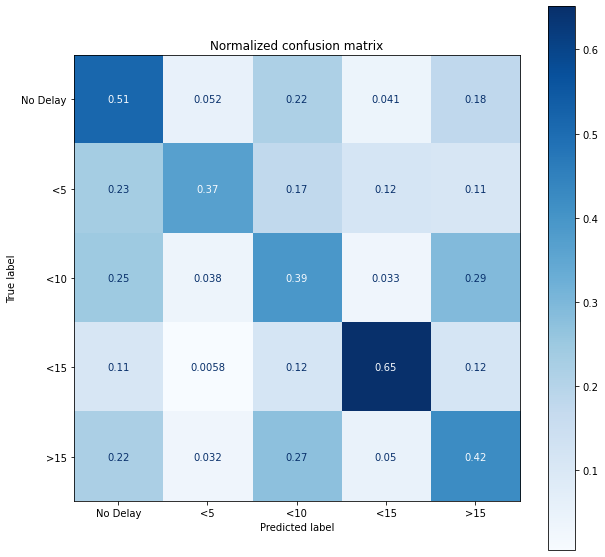

In [220]:
disp = metrics.plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                              display_labels=labels,
                              cmap=plt.cm.Blues,
                              normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
disp.figure_.set_size_inches(10, 10)

print(disp.confusion_matrix)

plt.show()

In [221]:
clf.best_estimator_

MLPClassifier(hidden_layer_sizes=(128, 64))

In [222]:
clf.best_params_

{'activation': 'relu', 'solver': 'adam'}

# Best Neural Network params

In [45]:
['No Delay', '<5', '<10', '<15', '>15']
[4, 2, 0, 1, 3]

[4, 2, 0, 1, 3]

In [46]:
y_train.value_counts(normalize=True)

4    0.822912
2    0.132147
0    0.025935
3    0.011658
1    0.007348
Name: DelayCategory, dtype: float64

In [47]:
y_test.value_counts(normalize=True)

4    0.822912
2    0.132133
0    0.025949
3    0.011629
1    0.007377
Name: DelayCategory, dtype: float64

In [128]:
n = 75856 * 2
smote = SMOTENC(categorical_features=[0, 1, 5, 6, 7], 
                sampling_strategy='auto',
                random_state=42
               )
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [129]:
y_train_smote.value_counts(normalize=True)

4    0.2
3    0.2
2    0.2
1    0.2
0    0.2
Name: DelayCategory, dtype: float64

In [55]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam')

In [51]:
clf.fit(X_train_smote, y_train_smote)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64))

In [52]:
labels = ['No Delay', '<5', '<10', '<15', '>15']

In [53]:
['No Delay', '<5', '<10', '<15', '>15']
[4, 2, 0, 1, 3]

[4, 2, 0, 1, 3]

[[0.18561873 0.05852843 0.28762542 0.05183946 0.41638796]
 [0.19411765 0.05882353 0.23529412 0.1        0.41176471]
 [0.14844007 0.03513957 0.28505747 0.03678161 0.49458128]
 [0.05970149 0.10820896 0.1119403  0.39552239 0.32462687]
 [0.12186248 0.02309639 0.21161147 0.02958237 0.61384729]]


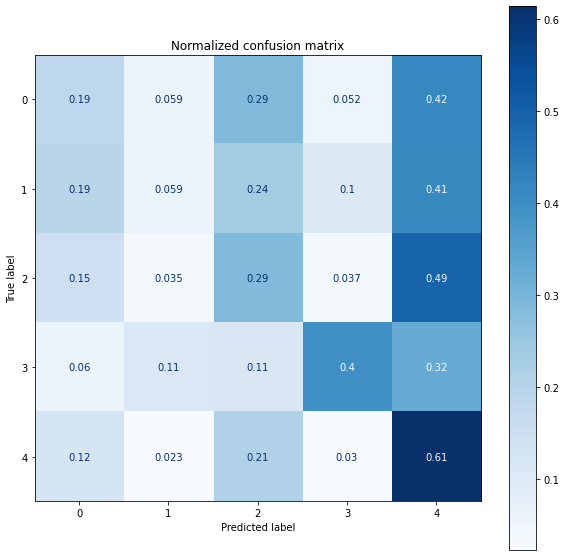

In [54]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,
                              cmap=plt.cm.Blues,
                              normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
disp.figure_.set_size_inches(10, 10)

print(disp.confusion_matrix)

plt.show()

In [178]:
y_pred = clf.predict(X_test)

In [179]:
labels = ['No Delay', '<5', '<10', '<15', '>15']

In [180]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.29      0.18       366
           1       0.08      0.19      0.11       120
           2       0.22      0.43      0.29      1641
           3       0.17      0.55      0.26       172
           4       0.87      0.64      0.74      9809

    accuracy                           0.59     12108
   macro avg       0.29      0.42      0.32     12108
weighted avg       0.74      0.59      0.65     12108



In [ ]:
['No Delay', '<5', '<10', '<15', '>15']
[4, 2, 0, 1, 3]
4    0.806570
2    0.137969
0    0.029733
3    0.016601
1    0.009126

# Random Forest

In [140]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 50, 200, None],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [141]:
rfc = ensemble.RandomForestClassifier(n_jobs=4, random_state=42)

In [143]:
clf = model_selection.GridSearchCV(rfc, param_grid=params, n_jobs=4)

In [144]:
clf.fit(X_train_smote, y_train_smote)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, random_state=42),
             n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 200, None],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall')

In [146]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

[[0.20568562 0.10033445 0.15217391 0.04347826 0.49832776]
 [0.17058824 0.10588235 0.12352941 0.11764706 0.48235294]
 [0.17077176 0.06042693 0.15139573 0.03087028 0.5865353 ]
 [0.0858209  0.04477612 0.05223881 0.59328358 0.2238806 ]
 [0.12460451 0.03216621 0.08189201 0.02831681 0.73302046]]


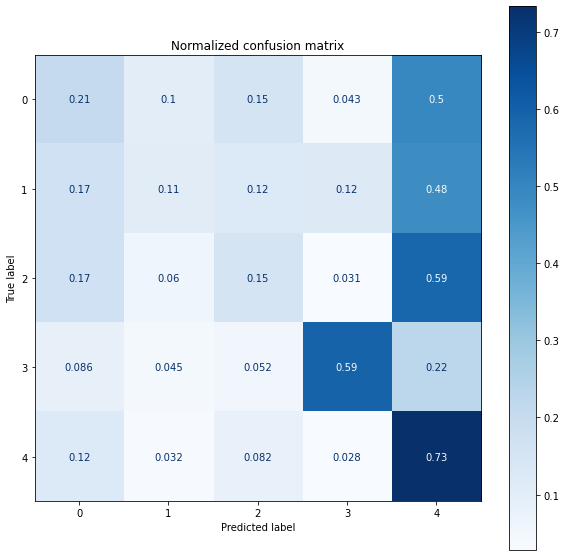

In [145]:
disp = metrics.plot_confusion_matrix(clf.best_estimator_, X_test, y_test,
                              cmap=plt.cm.Blues,
                              normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
disp.figure_.set_size_inches(10, 10)

print(disp.confusion_matrix)

plt.show()

In [147]:
df = pd.DataFrame(clf.cv_results_)

In [148]:
df.sort_values('mean_fit_time', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,43.690699,1.580256,2.032400,0.211734,entropy,50,sqrt,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
23,42.673097,1.241995,2.046201,0.260185,entropy,50,log2,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,41.801501,0.967713,1.981200,0.154151,entropy,200,sqrt,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
24,41.574299,0.421824,2.092301,0.111865,entropy,200,auto,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
21,41.395233,0.575800,1.934265,0.206457,entropy,50,auto,"{'criterion': 'entropy', 'max_depth': 50, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
27,41.366201,0.416960,1.911899,0.132183,entropy,None,auto,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
26,41.280000,0.221344,1.870900,0.137616,entropy,200,log2,"{'criterion': 'entropy', 'max_depth': 200, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
28,41.215999,0.463876,1.921202,0.119251,entropy,None,sqrt,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
18,37.558601,0.590930,1.360801,0.138443,entropy,20,auto,"{'criterion': 'entropy', 'max_depth': 20, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
20,37.169180,0.336344,1.496200,0.137863,entropy,20,log2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
